In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
heart_X = heart.drop(columns=['time'])
heart_y_reg = heart['time']

In [ ]:
num_cols = heart_X.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
imputer = SimpleImputer(strategy='median')
heart_X_imputed = heart_X.copy()
heart_X_imputed[num_cols] = imputer.fit_transform(heart_X[num_cols])

In [ ]:
scaler = StandardScaler()
heart_X_scaled = heart_X_imputed.copy()
heart_X_scaled[num_cols] = scaler.fit_transform(heart_X_imputed[num_cols])

In [ ]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(heart_X_scaled, heart_y_reg, test_size=0.2, random_state=42)

### LINEAR REGRESSION

In [ ]:
lr = LinearRegression()
lr.fit(X_train_h, y_train_h)
y_pred_lr = lr.predict(X_test_h)
mse = mean_squared_error(y_test_h, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_h, y_pred_lr)
print(f'MSE: {mse}\nRMSE: {rmse}\nR2: {r2}')

MSE: 4465.366398946193
RMSE: 66.82339709223254
R2: 0.1860325534841295


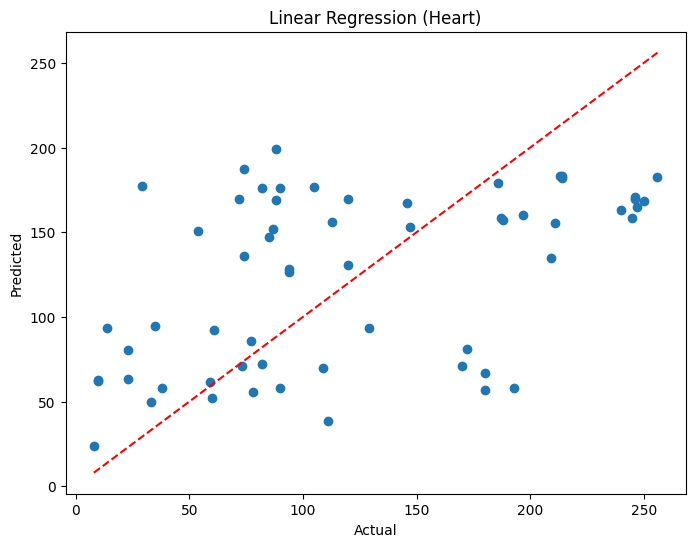

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_h, y_pred_lr)
mn = min(y_test_h.min(), y_pred_lr.min())
mx = max(y_test_h.max(), y_pred_lr.max())
plt.plot([mn, mx], [mn, mx], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression (Heart)')
plt.show()

In [ ]:
heart_y_bin = heart['DEATH_EVENT']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(heart_X_scaled, heart_y_bin, test_size=0.25, random_state=42)

### BINOMIAL LOGISTIC REGRESSION

In [ ]:
log_bin = LogisticRegression(max_iter=1000)
log_bin.fit(X_train_b, y_train_b)
y_pred_b = log_bin.predict(X_test_b)
y_proba_b = log_bin.predict_proba(X_test_b)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test_b, y_pred_b)
precision = precision_score(y_test_b, y_pred_b)
recall = recall_score(y_test_b, y_pred_b)
f1 = f1_score(y_test_b, y_pred_b)
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


[[44  0]
 [ 0 31]]


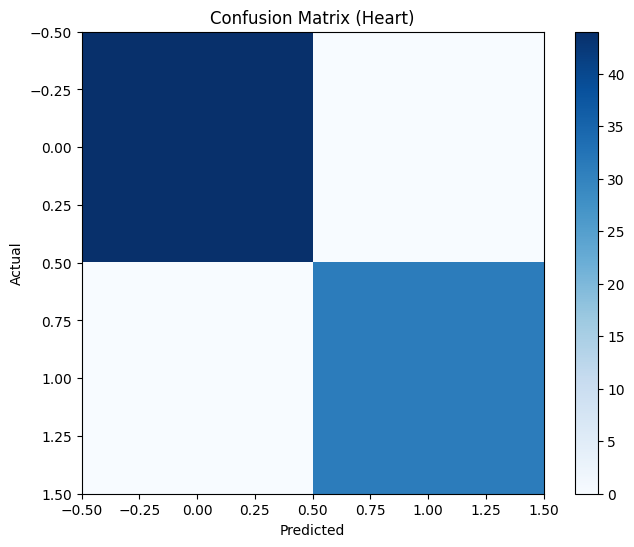

In [ ]:
cm = confusion_matrix(y_test_b, y_pred_b)
print(cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix (Heart)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

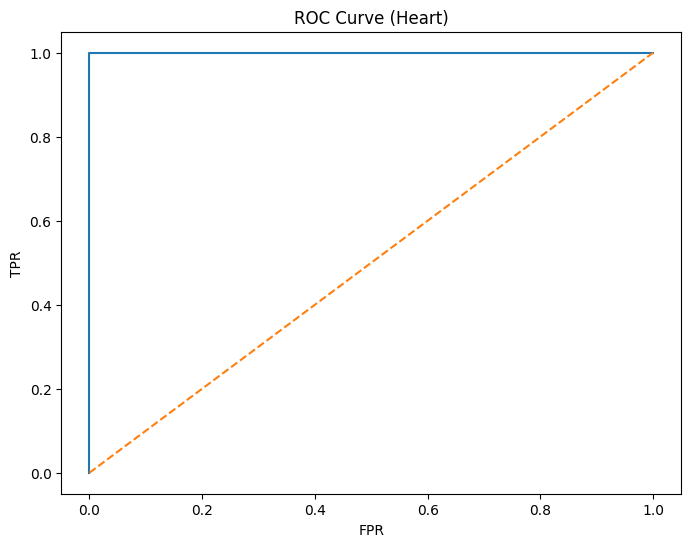

In [ ]:
fpr, tpr, _ = roc_curve(y_test_b, y_proba_b)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve (Heart)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
students = pd.read_csv('StudentsPerformance.csv')

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
students['avg_score'] = students[['math score', 'reading score', 'writing score']].mean(axis=1)
bins = [0, 60, 75, 101]
labels = ['C', 'B', 'A']
students['grade'] = pd.cut(students['avg_score'], bins=bins, labels=labels, include_lowest=True)
students['grade_ord'] = students['grade'].map({'C': 0, 'B': 1, 'A': 2})

In [ ]:
X_s = students.drop(columns=['math score', 'reading score', 'writing score', 'avg_score', 'grade', 'grade_ord'])
y_multi = students['grade']
y_ord = students['grade_ord']

In [ ]:
cat_cols = X_s.select_dtypes(include=['object']).columns.tolist()
num_cols_s = X_s.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
X_s_processed = X_s.copy()
if num_cols_s:
    imputer_s = SimpleImputer(strategy='median')
    X_s_processed[num_cols_s] = imputer_s.fit_transform(X_s[num_cols_s])

    scaler_s = StandardScaler()
    X_s_processed[num_cols_s] = scaler_s.fit_transform(X_s_processed[num_cols_s])

In [ ]:
if cat_cols:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_cats = encoder.fit_transform(X_s[cat_cols])
    encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))

    X_s_processed = X_s_processed.drop(columns=cat_cols)
    X_s_processed = pd.concat([X_s_processed.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

### MULTINOMIAL LOGISTIC REGRESSION

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_s_processed, y_multi, test_size=0.25, random_state=42)
log_multi = LogisticRegression(max_iter=1000)
log_multi.fit(X_train_m, y_train_m)
y_pred_m = log_multi.predict(X_test_m)

In [ ]:
print("\n=== MULTINOMIAL CLASSIFICATION METRICS ===")
print("Accuracy Score: ", accuracy_score(y_test_m, y_pred_m))
print("Precision Score: ", precision_score(y_test_m, y_pred_m, average='macro'))
print("Recall Score: ", recall_score(y_test_m, y_pred_m, average='macro'))
print("F1 Score: ", f1_score(y_test_m, y_pred_m, average='macro'))


=== MULTINOMIAL CLASSIFICATION METRICS ===
Accuracy Score:  0.472
Precision Score:  0.4785986945070046
Recall Score:  0.46740854275100846
F1 Score:  0.4710768086520231


In [ ]:
cm_multi = confusion_matrix(y_test_m, y_pred_m)
print("Confusion Matrix:")
print(cm_multi)

Confusion Matrix:
[[32 31 10]
 [25 51 23]
 [10 33 35]]


### ORDINAL LOGISTIC REGRESSION

In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_s_processed, y_ord, test_size=0.25, random_state=42)
sgd_ord = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
sgd_ord.fit(X_train_o, y_train_o)
y_pred_o = sgd_ord.predict(X_test_o)

In [ ]:
print("\n=== ORDINAL CLASSIFICATION METRICS ===")
print("Accuracy Score: ", accuracy_score(y_test_o, y_pred_o))
print("Precision Score: ", precision_score(y_test_o, y_pred_o, average='macro'))
print("Recall Score: ", recall_score(y_test_o, y_pred_o, average='macro'))
print("F1 Score: ", f1_score(y_test_o, y_pred_o, average='macro'))


=== ORDINAL CLASSIFICATION METRICS ===
Accuracy Score:  0.416
Precision Score:  0.4517663043478261
Recall Score:  0.37765608313553517
F1 Score:  0.31936185625729246


In [ ]:
cm_ord = confusion_matrix(y_test_o, y_pred_o)
print("Confusion Matrix:")
print(cm_ord)

Confusion Matrix:
[[29 49  0]
 [24 74  1]
 [11 61  1]]
